In [82]:
import numpy as np
import pandas as pd
import sklearn
import time
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV,train_test_split
import catboost as cb
from catboost import CatBoostClassifier,Pool
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.cluster import KMeans
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
pd.set_option('display.max_columns', None)

dtrain=pd.read_csv("C:/Users/T160/pythonworks/aidea_leave_job/train.csv")
season=pd.read_csv("C:/Users/T160/pythonworks/aidea_leave_job/season.csv")
dtest=pd.read_csv("C:/Users/T160/pythonworks/aidea_leave_job/test.csv")
dtrain

,yyyy,PerNo,PerStatus,sex,工作分類,職等,廠區代碼,管理層級,工作資歷1,工作資歷2,工作資歷3,工作資歷4,工作資歷5,專案時數,專案總數,當前專案角色,特殊專案佔比,工作地點,訓練時數A,訓練時數B,訓練時數C,生產總額,榮譽數,是否升遷,升遷速度,近三月請假數A,近一年請假數A,近三月請假數B,近一年請假數B,出差數A,出差數B,出差集中度,年度績效等級A,年度績效等級B,年度績效等級C,年齡層級,婚姻狀況,年資層級A,年資層級B,年資層級C,任職前工作平均年數,最高學歷,畢業學校類別,畢業科系類別,眷屬量,通勤成本,歸屬部門
0,2014,1,0,1.0,1.0,3.0,19.0,4.0,0.0,1.0,1.0,0.0,0.0,23.0,1.0,1.0,3.0,6.0,0.0,0.0,5.0,7.0,1.0,1.0,1.0,3.0,5.0,0.0,0.0,5.0,0.0,9.0,2.0,10.0,4.0,6.0,1.0,2.0,1.0,1.0,2.0,NaN,NaN,5.0,0.0,8.0,19138.0
1,2015,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,2.0,1.0,1.0,6.0,0.0,0.0,8.0,9.0,2.0,0.0,1.0,4.0,6.0,0.0,0.0,3.0,1.0,4.0,2.0,1.0,5.0,7.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0
2,2016,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,3.0,5.0,1.0,6.0,2.0,0.0,5.0,10.0,2.0,0.0,1.0,4.0,7.0,0.0,0.0,2.0,1.0,2.0,2.0,1.0,2.0,7.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0
3,2017,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,4.0,5.0,5.0,6.0,0.0,0.0,10.0,8.0,2.0,0.0,2.0,5.0,5.0,0.0,0.0,2.0,1.0,1.0,2.0,8.0,5.0,7.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0
4,2014,3,0,0.0,1.0,4.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,4.0,5.0,1.0,6.0,0.0,0.0,1.0,8.0,0.0,0.0,6.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0,2.0,9.0,1.0,5.0,5.0,0.0,0.0,2.0,4.0,1.0,2.0,8.0,8181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14387,2014,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,0.0,5.0,0.0,0.0,1.0,2.0,1.0,0.0,5.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,10.0,1.0,6.0,5.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0
14388,2015,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,22.0,1.0,5.0,0.0,5.0,0.0,0.0,0.0,2.0,1.0,0.0,5.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,10.0,1.0,6.0,5.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0
14389,2016,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,0.0,5.0,0.0,0.0,1.0,1.0,1.0,0.0,5.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,11.0,1.0,7.0,6.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0
14390,2017,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,1.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,2.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,11.0,1.0,7.0,6.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0


In [83]:
dtrain.rename(columns={'yyyy':'年份','PerNo':'個人編號','PerStatus':'離職與否','sex':'性別'}, inplace=True)
dtest.rename(columns={'yyyy':'年份','PerNo':'個人編號','PerStatus':'離職與否','sex':'性別'}, inplace=True)
season.rename(columns={'yyyy':'年份','PerNo':'個人編號','periodQ':'季'}, inplace=True)
del dtest['離職與否']
def pro_key(df):
    key=[]
    for i in range(0,len(df)):
        key.append(i+1)
    df['流水號']=key
    return df
dtrain=pro_key(dtrain)
dtest=pro_key(dtest)

In [84]:
# leave percent
print('未離職', round(dtrain['離職與否'].value_counts()[0]/len(dtrain) * 100,2), '% of the dataset')
print('已離職', round(dtrain['離職與否'].value_counts()[1]/len(dtrain) * 100,2), '% of the dataset')

未離職 94.47 % of the dataset
已離職 5.53 % of the dataset


In [85]:
# del dtrain['最高學歷']
# find out rows which have nan values
# nan_rows = dtrain[dtrain.isnull().any(1)]
dtrain.isna().sum()

年份              0
個人編號            0
離職與否            0
性別             73
工作分類           73
職等             73
廠區代碼           73
管理層級           73
工作資歷1          73
工作資歷2          73
工作資歷3          73
工作資歷4          73
工作資歷5          73
專案時數           73
專案總數           73
當前專案角色         73
特殊專案佔比         73
工作地點           73
訓練時數A          73
訓練時數B          73
訓練時數C          73
生產總額           73
榮譽數            73
是否升遷           73
升遷速度           73
近三月請假數A        73
近一年請假數A        73
近三月請假數B        73
近一年請假數B        73
出差數A           73
出差數B           73
出差集中度          73
年度績效等級A        73
年度績效等級B        73
年度績效等級C        73
年齡層級           73
婚姻狀況           73
年資層級A          73
年資層級B          73
年資層級C          73
任職前工作平均年數      73
最高學歷         5326
畢業學校類別       3841
畢業科系類別         73
眷屬量            73
通勤成本           73
歸屬部門           73
流水號             0
dtype: int64

In [86]:
# 這些類別標籤是1好還是2好
# 為何null都是73筆?選取為null的資料
# 工作資歷1-5似乎是one-hot encoding
# 將perNo一樣的groupby?參考season
# selectkbest=>model=>pipeline合併二者=>fit,predict


In [87]:
season.drop(season[season.年份 > 2017 ].index, inplace=True)
season.drop(columns=['季'], inplace=True)
season=season.groupby(['年份','個人編號']).sum()

# merge on 年份 個人編號，season只取2017，2018的跟test conacat 
dtrain=pd.merge(dtrain,season,how='inner',on=['年份','個人編號'])
dtrain

,年份,個人編號,離職與否,性別,工作分類,職等,廠區代碼,管理層級,工作資歷1,工作資歷2,工作資歷3,工作資歷4,工作資歷5,專案時數,專案總數,當前專案角色,特殊專案佔比,工作地點,訓練時數A,訓練時數B,訓練時數C,生產總額,榮譽數,是否升遷,升遷速度,近三月請假數A,近一年請假數A,近三月請假數B,近一年請假數B,出差數A_x,出差數B_x,出差集中度,年度績效等級A,年度績效等級B,年度績效等級C,年齡層級,婚姻狀況,年資層級A,年資層級B,年資層級C,任職前工作平均年數,最高學歷,畢業學校類別,畢業科系類別,眷屬量,通勤成本,歸屬部門,流水號,加班數,出差數A_y,出差數B_y,請假數A,請假數B
0,2014,1,0,1.0,1.0,3.0,19.0,4.0,0.0,1.0,1.0,0.0,0.0,23.0,1.0,1.0,3.0,6.0,0.0,0.0,5.0,7.0,1.0,1.0,1.0,3.0,5.0,0.0,0.0,5.0,0.0,9.0,2.0,10.0,4.0,6.0,1.0,2.0,1.0,1.0,2.0,NaN,NaN,5.0,0.0,8.0,19138.0,1,3,21,0,8,0
1,2015,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,2.0,1.0,1.0,6.0,0.0,0.0,8.0,9.0,2.0,0.0,1.0,4.0,6.0,0.0,0.0,3.0,1.0,4.0,2.0,1.0,5.0,7.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0,2,1,12,1,16,0
2,2016,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,3.0,5.0,1.0,6.0,2.0,0.0,5.0,10.0,2.0,0.0,1.0,4.0,7.0,0.0,0.0,2.0,1.0,2.0,2.0,1.0,2.0,7.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0,3,2,10,1,11,0
3,2017,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,4.0,5.0,5.0,6.0,0.0,0.0,10.0,8.0,2.0,0.0,2.0,5.0,5.0,0.0,0.0,2.0,1.0,1.0,2.0,8.0,5.0,7.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0,4,1,7,4,7,0
4,2014,3,0,0.0,1.0,4.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,4.0,5.0,1.0,6.0,0.0,0.0,1.0,8.0,0.0,0.0,6.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0,2.0,9.0,1.0,5.0,5.0,0.0,0.0,2.0,4.0,1.0,2.0,8.0,8181.0,5,0,0,0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14387,2014,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,0.0,5.0,0.0,0.0,1.0,2.0,1.0,0.0,5.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,10.0,1.0,6.0,5.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0,14388,0,0,0,10,0
14388,2015,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,22.0,1.0,5.0,0.0,5.0,0.0,0.0,0.0,2.0,1.0,0.0,5.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,10.0,1.0,6.0,5.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0,14389,0,0,0,22,0
14389,2016,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,0.0,5.0,0.0,0.0,1.0,1.0,1.0,0.0,5.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,11.0,1.0,7.0,6.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0,14390,0,0,0,10,0
14390,2017,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,1.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,2.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,11.0,1.0,7.0,6.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0,14391,4,1,0,9,0


In [88]:
season1=pd.read_csv("C:/Users/T160/pythonworks/aidea_leave_job/season.csv")
season1.rename(columns={'yyyy':'年份','PerNo':'個人編號','periodQ':'季'}, inplace=True)

season1.drop(season1[season1.年份 < 2018 ].index, inplace=True)
season1.drop(columns=['季'], inplace=True)
season1=season1.groupby(['年份','個人編號']).sum()
season1
# merge on 年份 個人編號，season 2018的跟test conacat 
dtest2=pd.merge(dtest,season1,how='inner',on=['年份','個人編號'])
dtest2

,年份,個人編號,性別,工作分類,職等,廠區代碼,管理層級,工作資歷1,工作資歷2,工作資歷3,工作資歷4,工作資歷5,專案時數,專案總數,當前專案角色,特殊專案佔比,工作地點,訓練時數A,訓練時數B,訓練時數C,生產總額,榮譽數,是否升遷,升遷速度,近三月請假數A,近一年請假數A,近三月請假數B,近一年請假數B,出差數A_x,出差數B_x,出差集中度,年度績效等級A,年度績效等級B,年度績效等級C,年齡層級,婚姻狀況,年資層級A,年資層級B,年資層級C,任職前工作平均年數,最高學歷,畢業學校類別,畢業科系類別,眷屬量,通勤成本,歸屬部門,流水號,加班數,出差數A_y,出差數B_y,請假數A,請假數B
0,2018,1,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,6.0,5.0,1.0,6.0,0.0,1.0,1.0,4.0,3.0,0.0,2.0,5.0,7.0,0.0,0.0,3.0,1.0,2.0,6.0,10.0,5.0,8.0,1.0,3.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0,1,0,11,5,10,0
1,2018,3,0.0,1.0,4.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,22.0,3.0,5.0,2.0,6.0,0.0,0.0,0.0,9.0,1.0,0.0,7.0,4.0,8.0,0.0,0.0,1.0,0.0,0.0,6.0,4.0,5.0,11.0,1.0,6.0,6.0,0.0,0.0,2.0,4.0,1.0,2.0,8.0,8181.0,2,0,3,0,13,0
2,2018,7,0.0,1.0,4.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,22.0,1.0,1.0,0.0,6.0,0.0,0.0,1.0,8.0,2.0,0.0,2.0,0.0,9.0,0.0,2.0,1.0,0.0,0.0,1.0,1.0,5.0,4.0,2.0,1.0,1.0,0.0,0.0,NaN,NaN,5.0,0.0,10.0,4010.0,3,5,3,0,12,5
3,2018,15,0.0,1.0,4.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,14.0,4.0,1.0,1.0,5.0,0.0,0.0,3.0,1.0,1.0,0.0,2.0,4.0,5.0,0.0,0.0,1.0,0.0,0.0,6.0,2.0,4.0,10.0,1.0,3.0,1.0,4.0,2.0,NaN,4.0,8.0,2.0,9.0,2177.0,4,0,4,0,6,0
4,2018,16,0.0,1.0,4.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,21.0,1.0,1.0,0.0,11.0,1.0,2.0,2.0,4.0,0.0,0.0,1.0,2.0,10.0,1.0,2.0,3.0,1.0,4.0,10.0,10.0,5.0,6.0,1.0,3.0,1.0,3.0,1.0,2.0,3.0,3.0,2.0,10.0,12072.0,5,0,13,2,15,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3734,2018,8761,1.0,1.0,7.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,0.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,0.0,0.0,1.0,0.0,0.0,10.0,7.0,2.0,6.0,2.0,2.0,1.0,1.0,1.0,2.0,NaN,5.0,0.0,8.0,20123.0,3735,1,1,0,7,0
3735,2018,8765,0.0,1.0,4.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,2.0,5.0,2.0,6.0,1.0,0.0,2.0,1.0,1.0,0.0,5.0,1.0,8.0,0.0,0.0,1.0,0.0,0.0,2.0,4.0,2.0,12.0,1.0,7.0,6.0,1.0,1.0,2.0,3.0,7.0,1.0,8.0,14053.0,3736,2,3,0,12,0
3736,2018,8767,1.0,1.0,4.0,13.0,1.0,0.0,0.0,0.0,1.0,1.0,23.0,3.0,5.0,1.0,6.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,4.0,7.0,0.0,0.0,2.0,1.0,2.0,10.0,8.0,5.0,3.0,2.0,2.0,2.0,0.0,0.0,2.0,4.0,7.0,0.0,8.0,13084.0,3737,2,9,1,10,0
3737,2018,8774,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,1.0,5.0,0.0,0.0,1.0,0.0,1.0,0.0,6.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,11.0,1.0,7.0,6.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0,3738,0,0,0,9,0


In [89]:
def features(dtrain):
    
    dtrain.fillna(-1,inplace=True)
    dtrain=dtrain.astype(float).astype(int)
    # 是否升遷=1時，升遷速度必定為1，推測原編碼 有升遷=0，沒升遷=1，交換兩者改為 有升遷=1，沒升遷=0
    dtrain['是否升遷']=dtrain['是否升遷'].map({1:0,0:1,-1:-1})
    
    dtrain['總工作資歷']=dtrain['工作資歷1']+dtrain['工作資歷2']+dtrain['工作資歷3']+dtrain['工作資歷4']+dtrain['工作資歷5']
    dtrain['總訓練時數']=dtrain['訓練時數A']+dtrain['訓練時數B']+dtrain['訓練時數C']

    dtrain['近三月請假總數']=dtrain['近三月請假數A']+dtrain['近三月請假數B']
    dtrain['請假總數AB']=dtrain['請假數A']+dtrain['請假數B']
    dtrain['近一年請假總數']=dtrain['近一年請假數A']+dtrain['近一年請假數B']
    dtrain['近三月、一年與請假總數AB']=dtrain['近三月請假總數']+dtrain['近一年請假總數']+dtrain['請假總數AB']

    dtrain['出差總數_x']=dtrain['出差數A_x']+dtrain['出差數B_x']
    dtrain['出差總數_y']=dtrain['出差數A_y']+dtrain['出差數B_y']
    dtrain['出差總數_x*出差集中度']=dtrain['出差總數_x']*dtrain['出差集中度']
    dtrain['出差總數_y*出差集中度']=dtrain['出差總數_y']*dtrain['出差集中度']

    dtrain['年度績效等級ABC']=dtrain['年度績效等級A']+dtrain['年度績效等級B']+dtrain['年度績效等級C']
    dtrain['年資層級ABC']=dtrain['年資層級A']+dtrain['年資層級B']+dtrain['年資層級C']
    dtrain['平均專案時數']=dtrain['專案時數']/dtrain['專案總數']
    dtrain['特專x角色']=dtrain['特殊專案佔比']*dtrain['當前專案角色']
    dtrain['職等x管理層級']=dtrain['職等']*dtrain['管理層級']
    dtrain['職等x工作分類']=dtrain['職等']*dtrain['工作分類']
    dtrain['管理層級x工作分類']=dtrain['管理層級']*dtrain['工作分類']
    dtrain['婚姻狀況+眷屬量']=dtrain['婚姻狀況']+dtrain['眷屬量']
    dtrain['工作平均年數+年齡層級']=dtrain['任職前工作平均年數']+dtrain['年齡層級']
    dtrain['工作平均年數+總工作資歷']=dtrain['任職前工作平均年數']+dtrain['總工作資歷']
    dtrain['加班數+出差總數_x+請假總數AB']=dtrain['加班數']+dtrain['出差總數_x']+dtrain['請假總數AB']
    dtrain['加班數+出差總數_y+請假總數AB']=dtrain['加班數']+dtrain['出差總數_x']+dtrain['請假總數AB']
    dtrain['榮譽數+特殊專案佔比']=dtrain['榮譽數']+dtrain['特殊專案佔比']


    dtrain['編號出現年份']=dtrain.groupby(['個人編號'])['流水號'].transform('count')
    dtrain['是否升遷x升遷速度']=dtrain['是否升遷']*dtrain['升遷速度']
    dtrain['是否升遷+升遷速度']=dtrain['是否升遷']+dtrain['升遷速度']

    dtrain['同部門人數']=dtrain.groupby(['歸屬部門'])['流水號'].transform('count')
    dtrain['同管理階層人數']=dtrain.groupby(['管理層級'])['流水號'].transform('count')
    dtrain['同職等人數']=dtrain.groupby(['職等'])['流水號'].transform('count')
    dtrain['同畢業學校類別人數']=dtrain.groupby(['畢業學校類別'])['流水號'].transform('count')
    dtrain['同廠區人數']=dtrain.groupby(['廠區代碼'])['流水號'].transform('count')
    dtrain['同工作地點人數']=dtrain.groupby(['工作地點'])['流水號'].transform('count')
    
    # fillna 
    dtrain.fillna(-1,inplace=True)
#     dtrain=dtrain.astype(float).astype(int).astype(str)
    dtrain=dtrain.astype(str)
    
    return dtrain

dtrain=features(dtrain)
dtest2=features(dtest2)

In [90]:
cat_features=[c for c in dtrain.columns if c not in ['年份','離職與否','流水號']]
cols=[c for c in dtrain.columns if c not in ['年份','離職與否','流水號']]

X_train, X_valid, y_train, y_valid = train_test_split(dtrain[cols], dtrain['離職與否'], stratify= dtrain['離職與否'],
                                                      test_size=0.3, random_state=777)

# train
train_pool = Pool(data=X_train, label=y_train, cat_features=cat_features)
# validation
validate_pool = Pool(data=X_valid, label=y_valid, cat_features=cat_features)

In [13]:
# from sklearn.decomposition import PCA
# # after 
# pca = PCA(n_components=2)
# pca_X_train=pca.fit_transform(dtrain[cols])
# pca_X_train=pca.inverse_transform(dtrain[cols])
# # plot 2D
# plt.figure(figsize=(8,6))
# plt.scatter(pca_X_train[:,0],pca_X_train[:,1],c= y_train,cmap='rainbow')
# plt.xlabel('First principal component')
# plt.ylabel('Second Principal Component')

In [14]:
# clustering

# k_dtrain3 = KMeans(n_clusters=3, random_state=777).fit(dtrain[cols])
# k_dtrain4 = KMeans(n_clusters=4, random_state=777).fit(dtrain[cols])

# dtrain['分3群']=k_dtrain3.labels_.tolist()
# dtrain['分4群']=k_dtrain4.labels_.tolist()

# from sklearn.cluster import DBSCAN
# cluster_dtrain = DBSCAN(eps=0.5, min_samples=10, metric='euclidean', 
#                         metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None).fit(dtrain)
# cluster_dtrain.labels_

# # function to get unique values 
# def unique(list1): 
  
#     # intilize a null list 
#     unique_list = [] 
      
#     # traverse for all elements 
#     for x in list1: 
#         # check if exists in unique_list or not 
#         if x not in unique_list: 
#             unique_list.append(x) 
#     # print list 
#     for x in unique_list: 
#         print (x)
        
# unique(cluster_dtrain.labels_)

In [59]:
# class f_betaMetric(object):
    
#     def get_final_error(self, error, weight):
#         return error
    
#     def is_max_optimal(self):
#         # higher return values are better than lower return values
#         return True
    
#     def evaluate(self, approxes, target, weight=None):
#         # approxes - list of list-like objects , usual prediction column with the same shape as our labels/target column
#         # target - list-like object
#         # weight - list-like object, can be None
#         assert len(approxes) == 1
#         assert len(target) == len(approxes[0])
#         target = dtrain.get_label()
#         approx = approxes[0]
#         pred = [0 for i in range(len(target))]

#         error_sum = 0.0
#         weight_sum = 0.0
#         for i in xrange(len(approx)):
#             w = 1.0 if weight is None else weight[i]
#             weight_sum += w
#             error_sum += w * (target[i] * approx[i] - math.log(1 + math.exp(approx[i])))
            
#         return 'f_beta_score', 3.25 * (precision*recall)/((2.25*precision)+recall)
        
    
# def f_beta(preds,dtrain):
#     label = dtrain.get_label()
#     preds = 1.0/(1.0+np.exp(-preds))
#     pred = [int(i >= 0.5) for i in preds]
#     tp = sum([int(i == 1 and j == 1) for i,j in zip(pred,label)])
#     precision=float(tp)/sum(pred)
#     recall=float(tp)/sum(label)
#     return 'f_beta_score', 3.25 * (precision*recall)/((2.25*precision)+recall)

In [91]:
%%time

cat1 = CatBoostClassifier(
                           learning_rate=0.1,
                           n_estimators=500,
                           class_weights=[1.0,2.5],
#                            eval_metric=f_betaMetric,
                           eval_metric='Recall',
                           task_type="GPU"
                           
)
# we don't need to specify this parameter as pool object contains info about categorical features
cat1.fit(train_pool,  eval_set=validate_pool,verbose=True,use_best_model=True)

0:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 187ms	remaining: 1m 33s
1:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 350ms	remaining: 1m 27s
2:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 518ms	remaining: 1m 25s
3:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 684ms	remaining: 1m 24s
4:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 824ms	remaining: 1m 21s
5:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 996ms	remaining: 1m 21s
6:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 1.16s	remaining: 1m 21s
7:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 1.32s	remaining: 1m 21s
8:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 1.49s	remaining: 1m 21s
9:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 1.66s	remaining: 1m 21s
10:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 1.79s	remaining: 1m 19s
11:	learn: 0.0000000	test: 0.0000000	best:

93:	learn: 0.4991023	test: 0.6025105	best: 0.7196653 (14)	total: 15.9s	remaining: 1m 8s
94:	learn: 0.5062837	test: 0.5983264	best: 0.7196653 (14)	total: 16s	remaining: 1m 8s
95:	learn: 0.5062837	test: 0.5983264	best: 0.7196653 (14)	total: 16.2s	remaining: 1m 8s
96:	learn: 0.5116697	test: 0.6066946	best: 0.7196653 (14)	total: 16.4s	remaining: 1m 8s
97:	learn: 0.5080790	test: 0.6108787	best: 0.7196653 (14)	total: 16.5s	remaining: 1m 7s
98:	learn: 0.5080790	test: 0.6108787	best: 0.7196653 (14)	total: 16.7s	remaining: 1m 7s
99:	learn: 0.5116697	test: 0.6108787	best: 0.7196653 (14)	total: 16.9s	remaining: 1m 7s
100:	learn: 0.5116697	test: 0.6108787	best: 0.7196653 (14)	total: 17s	remaining: 1m 7s
101:	learn: 0.5116697	test: 0.6108787	best: 0.7196653 (14)	total: 17.2s	remaining: 1m 7s
102:	learn: 0.5152603	test: 0.6108787	best: 0.7196653 (14)	total: 17.4s	remaining: 1m 6s
103:	learn: 0.5188510	test: 0.6066946	best: 0.7196653 (14)	total: 17.5s	remaining: 1m 6s
104:	learn: 0.5170557	test: 0.61

187:	learn: 0.5547576	test: 0.5941423	best: 0.7196653 (14)	total: 31.5s	remaining: 52.2s
188:	learn: 0.5529623	test: 0.6025105	best: 0.7196653 (14)	total: 31.7s	remaining: 52.1s
189:	learn: 0.5529623	test: 0.6025105	best: 0.7196653 (14)	total: 31.8s	remaining: 51.9s
190:	learn: 0.5529623	test: 0.6025105	best: 0.7196653 (14)	total: 32s	remaining: 51.7s
191:	learn: 0.5529623	test: 0.6025105	best: 0.7196653 (14)	total: 32.1s	remaining: 51.5s
192:	learn: 0.5547576	test: 0.6108787	best: 0.7196653 (14)	total: 32.3s	remaining: 51.4s
193:	learn: 0.5547576	test: 0.6108787	best: 0.7196653 (14)	total: 32.4s	remaining: 51.2s
194:	learn: 0.5547576	test: 0.6150628	best: 0.7196653 (14)	total: 32.6s	remaining: 51s
195:	learn: 0.5529623	test: 0.6150628	best: 0.7196653 (14)	total: 32.8s	remaining: 50.9s
196:	learn: 0.5529623	test: 0.6150628	best: 0.7196653 (14)	total: 33s	remaining: 50.7s
197:	learn: 0.5529623	test: 0.6150628	best: 0.7196653 (14)	total: 33.1s	remaining: 50.5s
198:	learn: 0.5547576	test:

281:	learn: 0.5619390	test: 0.5983264	best: 0.7196653 (14)	total: 46.3s	remaining: 35.8s
282:	learn: 0.5619390	test: 0.5983264	best: 0.7196653 (14)	total: 46.5s	remaining: 35.6s
283:	learn: 0.5637343	test: 0.5983264	best: 0.7196653 (14)	total: 46.6s	remaining: 35.4s
284:	learn: 0.5619390	test: 0.5899582	best: 0.7196653 (14)	total: 46.7s	remaining: 35.3s
285:	learn: 0.5619390	test: 0.5941423	best: 0.7196653 (14)	total: 46.9s	remaining: 35.1s
286:	learn: 0.5619390	test: 0.5941423	best: 0.7196653 (14)	total: 47s	remaining: 34.9s
287:	learn: 0.5637343	test: 0.5899582	best: 0.7196653 (14)	total: 47.2s	remaining: 34.7s
288:	learn: 0.5637343	test: 0.5899582	best: 0.7196653 (14)	total: 47.3s	remaining: 34.6s
289:	learn: 0.5619390	test: 0.5857741	best: 0.7196653 (14)	total: 47.5s	remaining: 34.4s
290:	learn: 0.5619390	test: 0.5857741	best: 0.7196653 (14)	total: 47.6s	remaining: 34.2s
291:	learn: 0.5619390	test: 0.5857741	best: 0.7196653 (14)	total: 47.8s	remaining: 34s
292:	learn: 0.5637343	tes

374:	learn: 0.5834829	test: 0.5941423	best: 0.7196653 (14)	total: 1m	remaining: 20.3s
375:	learn: 0.5816876	test: 0.5941423	best: 0.7196653 (14)	total: 1m 1s	remaining: 20.1s
376:	learn: 0.5834829	test: 0.5941423	best: 0.7196653 (14)	total: 1m 1s	remaining: 20s
377:	learn: 0.5852783	test: 0.5983264	best: 0.7196653 (14)	total: 1m 1s	remaining: 19.8s
378:	learn: 0.5852783	test: 0.5983264	best: 0.7196653 (14)	total: 1m 1s	remaining: 19.7s
379:	learn: 0.5834829	test: 0.5983264	best: 0.7196653 (14)	total: 1m 1s	remaining: 19.5s
380:	learn: 0.5834829	test: 0.5983264	best: 0.7196653 (14)	total: 1m 1s	remaining: 19.3s
381:	learn: 0.5834829	test: 0.5983264	best: 0.7196653 (14)	total: 1m 2s	remaining: 19.2s
382:	learn: 0.5834829	test: 0.5983264	best: 0.7196653 (14)	total: 1m 2s	remaining: 19s
383:	learn: 0.5852783	test: 0.5983264	best: 0.7196653 (14)	total: 1m 2s	remaining: 18.9s
384:	learn: 0.5852783	test: 0.5983264	best: 0.7196653 (14)	total: 1m 2s	remaining: 18.7s
385:	learn: 0.5852783	test: 

467:	learn: 0.5888689	test: 0.5983264	best: 0.7196653 (14)	total: 1m 14s	remaining: 5.07s
468:	learn: 0.5888689	test: 0.5983264	best: 0.7196653 (14)	total: 1m 14s	remaining: 4.91s
469:	learn: 0.5888689	test: 0.5983264	best: 0.7196653 (14)	total: 1m 14s	remaining: 4.75s
470:	learn: 0.5888689	test: 0.5983264	best: 0.7196653 (14)	total: 1m 14s	remaining: 4.59s
471:	learn: 0.5888689	test: 0.5983264	best: 0.7196653 (14)	total: 1m 14s	remaining: 4.43s
472:	learn: 0.5888689	test: 0.5983264	best: 0.7196653 (14)	total: 1m 14s	remaining: 4.27s
473:	learn: 0.5888689	test: 0.5983264	best: 0.7196653 (14)	total: 1m 14s	remaining: 4.11s
474:	learn: 0.5888689	test: 0.5983264	best: 0.7196653 (14)	total: 1m 15s	remaining: 3.95s
475:	learn: 0.5888689	test: 0.5983264	best: 0.7196653 (14)	total: 1m 15s	remaining: 3.79s
476:	learn: 0.5888689	test: 0.5983264	best: 0.7196653 (14)	total: 1m 15s	remaining: 3.63s
477:	learn: 0.5888689	test: 0.5983264	best: 0.7196653 (14)	total: 1m 15s	remaining: 3.47s
478:	learn

In [78]:
%%time

cat1 = CatBoostClassifier(
                           learning_rate=0.1,
                           n_estimators=500,
                           class_weights=[1.0,2.5],
#                            eval_metric=f_betaMetric,
                           eval_metric='F1',
                           task_type="GPU"
                           
)
# we don't need to specify this parameter as pool object contains info about categorical features
cat1.fit(train_pool,  eval_set=validate_pool,verbose=True,use_best_model=True)

0:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 216ms	remaining: 1m 47s
1:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 448ms	remaining: 1m 51s
2:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 683ms	remaining: 1m 53s
3:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 885ms	remaining: 1m 49s
4:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 1.05s	remaining: 1m 44s
5:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 1.25s	remaining: 1m 43s
6:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 1.47s	remaining: 1m 43s
7:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 1.68s	remaining: 1m 43s
8:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 1.89s	remaining: 1m 42s
9:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 2.15s	remaining: 1m 45s
10:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 2.36s	remaining: 1m 44s
11:	learn: 0.0000000	test: 0.0000000	best:

93:	learn: 0.6068544	test: 0.6675939	best: 0.6743119 (90)	total: 20.4s	remaining: 1m 28s
94:	learn: 0.6145130	test: 0.6657356	best: 0.6743119 (90)	total: 20.7s	remaining: 1m 28s
95:	learn: 0.6142453	test: 0.6669776	best: 0.6743119 (90)	total: 21s	remaining: 1m 28s
96:	learn: 0.6168831	test: 0.6700555	best: 0.6743119 (90)	total: 21.3s	remaining: 1m 28s
97:	learn: 0.6162892	test: 0.6749884	best: 0.6749884 (97)	total: 21.5s	remaining: 1m 28s
98:	learn: 0.6162892	test: 0.6749884	best: 0.6749884 (97)	total: 21.7s	remaining: 1m 27s
99:	learn: 0.6179532	test: 0.6762390	best: 0.6762390 (99)	total: 21.9s	remaining: 1m 27s
100:	learn: 0.6176853	test: 0.6762390	best: 0.6762390 (99)	total: 22.1s	remaining: 1m 27s
101:	learn: 0.6179532	test: 0.6762390	best: 0.6762390 (99)	total: 22.3s	remaining: 1m 27s
102:	learn: 0.6206747	test: 0.6762390	best: 0.6762390 (99)	total: 22.6s	remaining: 1m 27s
103:	learn: 0.6231134	test: 0.6731662	best: 0.6762390 (99)	total: 22.8s	remaining: 1m 26s
104:	learn: 0.62216

184:	learn: 0.6558442	test: 0.6796578	best: 0.7005495 (125)	total: 40.1s	remaining: 1m 8s
185:	learn: 0.6659483	test: 0.6758686	best: 0.7005495 (125)	total: 40.3s	remaining: 1m 8s
186:	learn: 0.6659483	test: 0.6758686	best: 0.7005495 (125)	total: 40.5s	remaining: 1m 7s
187:	learn: 0.6656614	test: 0.6758686	best: 0.7005495 (125)	total: 40.7s	remaining: 1m 7s
188:	learn: 0.6639362	test: 0.6834362	best: 0.7005495 (125)	total: 41s	remaining: 1m 7s
189:	learn: 0.6639362	test: 0.6834362	best: 0.7005495 (125)	total: 41.2s	remaining: 1m 7s
190:	learn: 0.6639362	test: 0.6834362	best: 0.7005495 (125)	total: 41.4s	remaining: 1m 6s
191:	learn: 0.6639362	test: 0.6834362	best: 0.7005495 (125)	total: 41.5s	remaining: 1m 6s
192:	learn: 0.6653747	test: 0.6883545	best: 0.7005495 (125)	total: 41.8s	remaining: 1m 6s
193:	learn: 0.6650882	test: 0.6883545	best: 0.7005495 (125)	total: 41.9s	remaining: 1m 6s
194:	learn: 0.6650882	test: 0.6914393	best: 0.7005495 (125)	total: 42.2s	remaining: 1m 5s
195:	learn: 

277:	learn: 0.6690816	test: 0.6808511	best: 0.7005495 (125)	total: 59.5s	remaining: 47.5s
278:	learn: 0.6687966	test: 0.6783681	best: 0.7005495 (125)	total: 59.7s	remaining: 47.3s
279:	learn: 0.6673797	test: 0.6790123	best: 0.7005495 (125)	total: 59.9s	remaining: 47.1s
280:	learn: 0.6685177	test: 0.6796578	best: 0.7005495 (125)	total: 1m	remaining: 46.8s
281:	learn: 0.6685177	test: 0.6790123	best: 0.7005495 (125)	total: 1m	remaining: 46.6s
282:	learn: 0.6693755	test: 0.6796578	best: 0.7005495 (125)	total: 1m	remaining: 46.4s
283:	learn: 0.6710836	test: 0.6809524	best: 0.7005495 (125)	total: 1m	remaining: 46.1s
284:	learn: 0.6685177	test: 0.6733524	best: 0.7005495 (125)	total: 1m	remaining: 45.9s
285:	learn: 0.6682323	test: 0.6765126	best: 0.7005495 (125)	total: 1m 1s	remaining: 45.7s
286:	learn: 0.6690894	test: 0.6765126	best: 0.7005495 (125)	total: 1m 1s	remaining: 45.4s
287:	learn: 0.6705104	test: 0.6739962	best: 0.7005495 (125)	total: 1m 1s	remaining: 45.2s
288:	learn: 0.6707968	tes

369:	learn: 0.6859434	test: 0.6784520	best: 0.7005495 (125)	total: 1m 19s	remaining: 27.8s
370:	learn: 0.6862331	test: 0.6791009	best: 0.7005495 (125)	total: 1m 19s	remaining: 27.6s
371:	learn: 0.6862331	test: 0.6791009	best: 0.7005495 (125)	total: 1m 19s	remaining: 27.4s
372:	learn: 0.6848446	test: 0.6791009	best: 0.7005495 (125)	total: 1m 19s	remaining: 27.2s
373:	learn: 0.6865230	test: 0.6771578	best: 0.7005495 (125)	total: 1m 20s	remaining: 27s
374:	learn: 0.6865230	test: 0.6778043	best: 0.7005495 (125)	total: 1m 20s	remaining: 26.7s
375:	learn: 0.6857143	test: 0.6784520	best: 0.7005495 (125)	total: 1m 20s	remaining: 26.5s
376:	learn: 0.6871036	test: 0.6765126	best: 0.7005495 (125)	total: 1m 20s	remaining: 26.3s
377:	learn: 0.6876186	test: 0.6803045	best: 0.7005495 (125)	total: 1m 20s	remaining: 26.1s
378:	learn: 0.6876186	test: 0.6803045	best: 0.7005495 (125)	total: 1m 21s	remaining: 25.9s
379:	learn: 0.6871036	test: 0.6790123	best: 0.7005495 (125)	total: 1m 21s	remaining: 25.7s
3

460:	learn: 0.6889309	test: 0.6783681	best: 0.7005495 (125)	total: 1m 35s	remaining: 8.11s
461:	learn: 0.6889309	test: 0.6783681	best: 0.7005495 (125)	total: 1m 36s	remaining: 7.9s
462:	learn: 0.6889309	test: 0.6783681	best: 0.7005495 (125)	total: 1m 36s	remaining: 7.68s
463:	learn: 0.6889309	test: 0.6783681	best: 0.7005495 (125)	total: 1m 36s	remaining: 7.47s
464:	learn: 0.6889309	test: 0.6783681	best: 0.7005495 (125)	total: 1m 36s	remaining: 7.26s
465:	learn: 0.6889309	test: 0.6783681	best: 0.7005495 (125)	total: 1m 36s	remaining: 7.05s
466:	learn: 0.6889309	test: 0.6783681	best: 0.7005495 (125)	total: 1m 36s	remaining: 6.84s
467:	learn: 0.6889309	test: 0.6783681	best: 0.7005495 (125)	total: 1m 37s	remaining: 6.63s
468:	learn: 0.6889309	test: 0.6783681	best: 0.7005495 (125)	total: 1m 37s	remaining: 6.42s
469:	learn: 0.6889309	test: 0.6783681	best: 0.7005495 (125)	total: 1m 37s	remaining: 6.21s
470:	learn: 0.6889309	test: 0.6783681	best: 0.7005495 (125)	total: 1m 37s	remaining: 6s
471

Text(0.5, 1.0, 'Feature_Importances (FE4)')

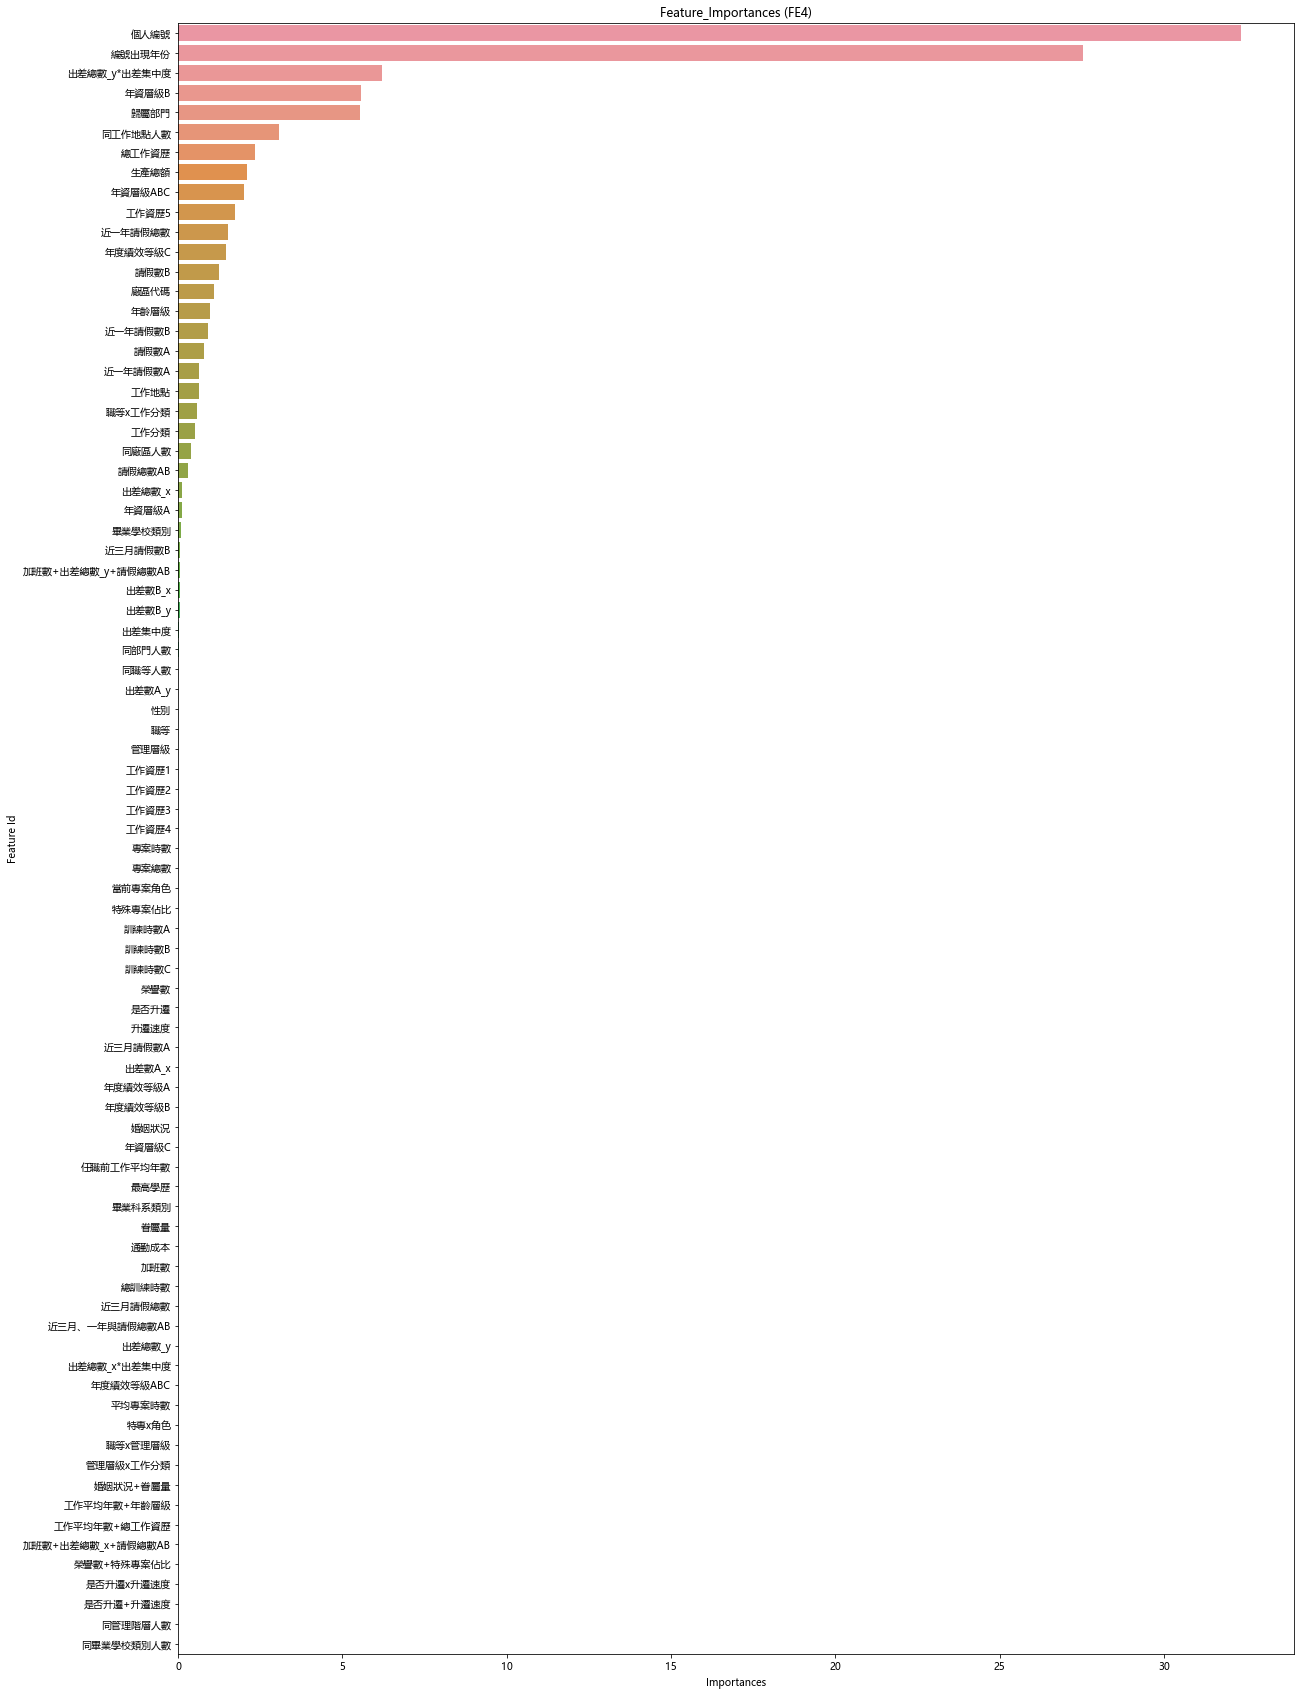

In [79]:
feature_importances = cat1.get_feature_importance(data=train_pool,prettified=True)

plt.figure(figsize=(20, 30))
ax = sns.barplot(data=feature_importances, x='Importances', y='Feature Id')
plt.title('Feature_Importances (FE4)')
# plt.savefig("C:/Users/T160/pythonworks/aidea_leave_job/feature importance/Feature_Importances (FE3-drop年).png")

Text(0.5, 1.0, 'Feature_Importances (FE4)')

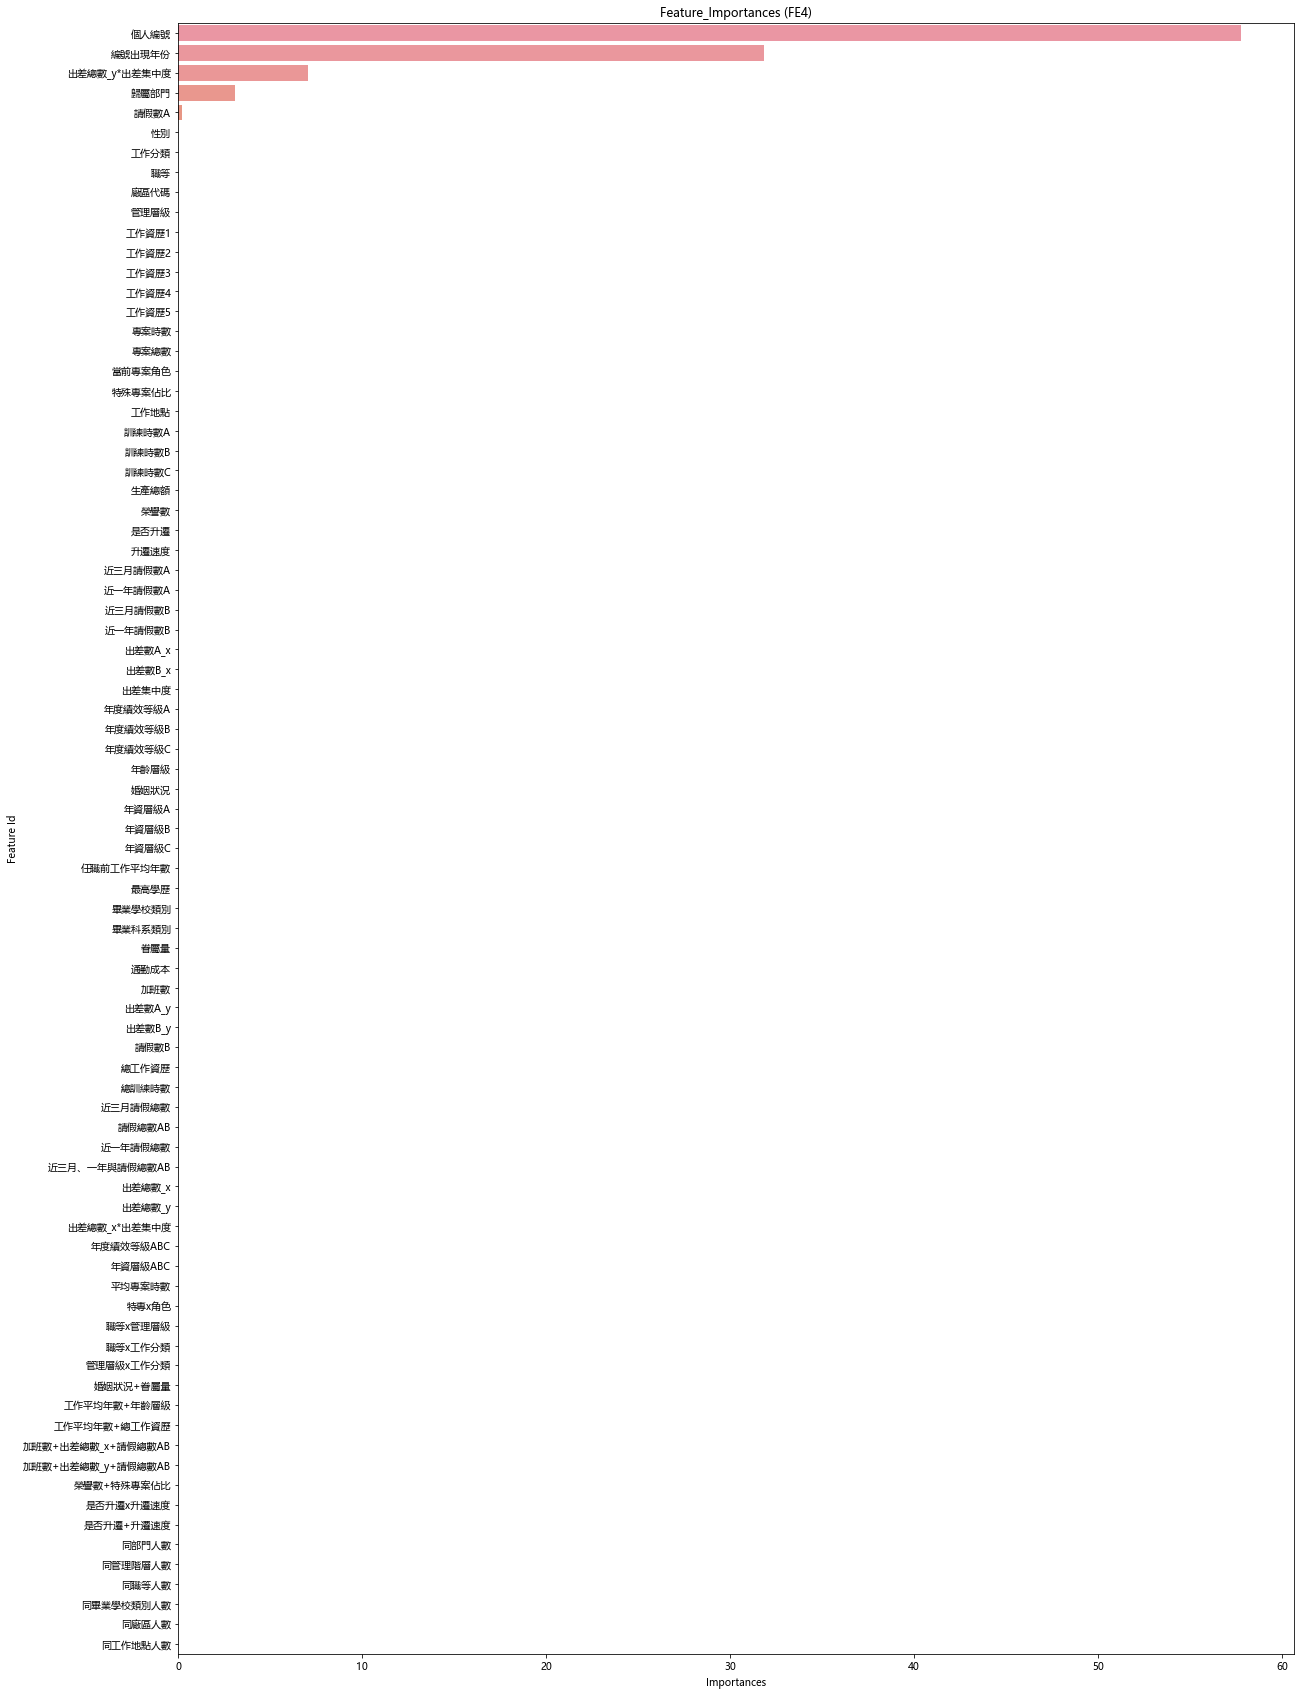

In [92]:
# recall
feature_importances = cat1.get_feature_importance(data=train_pool,prettified=True)

plt.figure(figsize=(20, 30))
ax = sns.barplot(data=feature_importances, x='Importances', y='Feature Id')
plt.title('Feature_Importances (FE4)')

In [93]:
test2_pool = Pool(data=dtest2, label=None, cat_features=cat_features)

In [94]:
predictions=cat1.predict(test2_pool)

results = pd.DataFrame({'PerNo':dtest2['個人編號'].values, 'PerStatus':predictions.astype(np.int32)})

results.to_csv('C:/Users/T160/pythonworks/aidea_leave_job/results2.csv', index=False, float_format='%.4f')


In [ ]:
# confusion matrix


In [ ]:
# 生產總額圖


In [ ]:
# 近一年請假數A


In [ ]:
# 年資層級A


In [ ]:
train_no=dtrain['個人編號'].tolist()
test_no=dtest['個人編號'].tolist()

accordance_ratio=len(set(train_no) & set(test_no))/len(test_no)
# Do not drop perNo
print(accordance_ratio)